In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")

because we have three differerent dataset we need to comine all three into one to work on for further process


In [3]:
df =  pd.concat([df1, df2, df3], ignore_index=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.67100,2.460150,2.489,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.00000,0.000000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


Here we saw we now got 1 dataframe to work on 

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [7]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.67100,2.460150,2.489,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.00000,0.000000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [8]:
#check dulicated entry
df.duplicated().sum() 

0

#Drop the columns that are not necessary
Columns we are going remove are :

estimated_generation_gwh - Empty
wepp_id - Empty
other_fuel2 - 98% data missing
other_fuel3 - Empty
owner - More than 60 % data missing
year_of_capacity_data - Missing data with single unique value
country - non relevalent info
country_long - non relevalent info
gppd_idnr -non relevalent info
url - No missing value but of no use

In [9]:
df.drop(columns=["country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   name                    13298 non-null  object 
 2   capacity_mw             13292 non-null  float64
 3   latitude                13220 non-null  float64
 4   longitude               13220 non-null  float64
 5   primary_fuel            11294 non-null  object 
 6   other_fuel1             1628 non-null   object 
 7   commissioning_year      10654 non-null  float64
 8   source                  13298 non-null  object 
 9   geolocation_source      13275 non-null  object 
 10  generation_gwh_2013     7170 non-null   float64
 11  generation_gwh_2014     7534 non-null   float64
 12  generation_gwh_2015     7993 non-null   float64
 13  generation_gwh_2016     8701 non-null   float64
 14  generation_gwh_2017     9292 non-null 

In [11]:
#finding percentage of missing values in our dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                      11670       87.757558
generation_gwh_2013               6128       46.082118
generation_gwh_2014               5764       43.344864
generation_gwh_2015               5305       39.893217
generation_gwh_2016               4597       34.569108
generation_gwh_2017               4006       30.124831
generation_gwh_2019               3520       26.470146
generation_gwh_2018               3440       25.868552
commissioning_year                2644       19.882689
generation_data_source            2463       18.521582
primary_fuel                      2004       15.069935
latitude                            78        0.586554
longitude                           78        0.586554
geolocation_source                  23        0.172958
capacity_mw                          6        0.045120
name                                 0        0.000000
source                               0        0.000000
country   

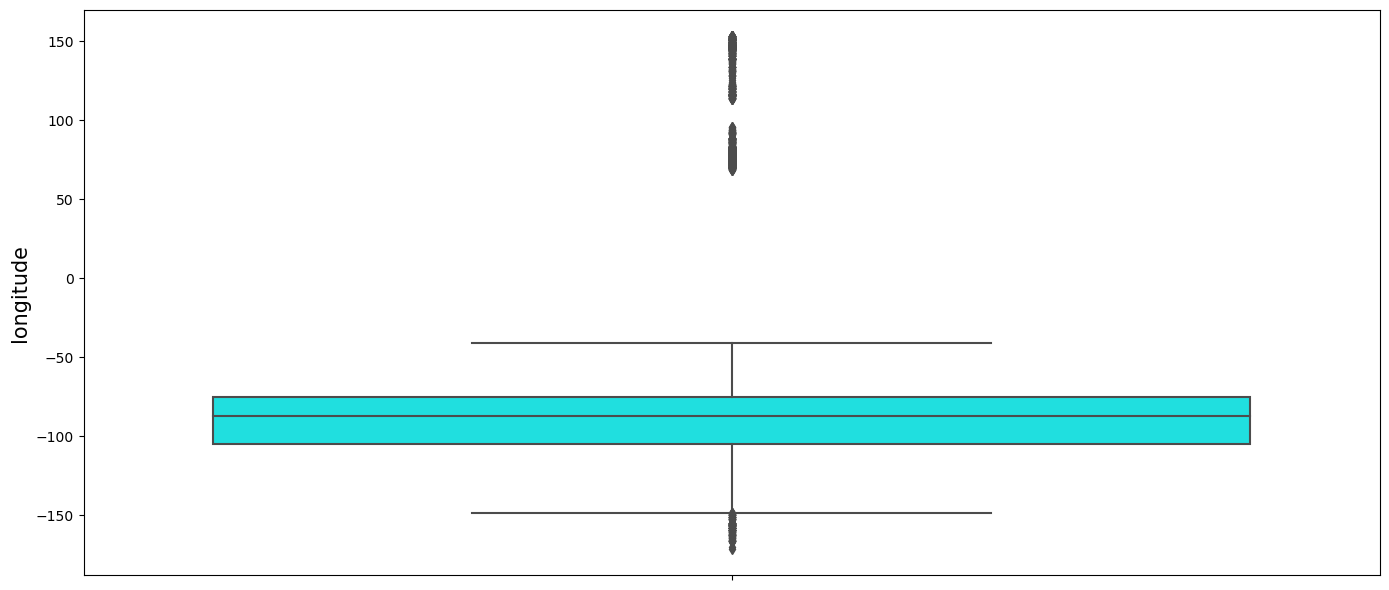

In [12]:
#Missing value Impuatation
plt.figure(figsize=(14,6))

sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)


plt.tight_layout()
plt.show()

In [13]:
# there are many outliers present we can fill null values first
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())


In [14]:
# again check missing value data
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                      11670       87.757558
generation_gwh_2013               6128       46.082118
generation_gwh_2014               5764       43.344864
generation_gwh_2015               5305       39.893217
generation_gwh_2016               4597       34.569108
generation_gwh_2017               4006       30.124831
generation_gwh_2019               3520       26.470146
generation_gwh_2018               3440       25.868552
commissioning_year                2644       19.882689
generation_data_source            2463       18.521582
primary_fuel                      2004       15.069935
capacity_mw                          6        0.045120
country                              0        0.000000
name                                 0        0.000000
source                               0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocatio

In [15]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13292.000000,13298.000000,13298.000000,10654.000000,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000
mean,117.738717,35.053213,-73.873706,1998.184904,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.169038,15.398830,62.692711,24.017781,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305
min,0.000000,-42.888300,-171.712400,1896.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.914250,-104.583400,1988.000000,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250
50%,5.500000,38.330650,-87.346000,2008.000000,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500
75%,52.725000,42.166025,-75.535425,2015.000000,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


In [16]:
df.loc[df.capacity_mw.isnull()]

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
920,AUS,Bald Hill Wind Farm,NaN,-38.7468,145.9493,Wind,NaN,1986.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,AUS,Bulgana Wind Farm,NaN,-37.1181,142.9625,Wind,NaN,2002.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,AUS,Childers Solar Farm,NaN,-25.2928,152.4050,Solar,NaN,2012.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1290,AUS,Silverton Wind Farm,NaN,-31.8068,141.2686,Wind,NaN,2003.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,AUS,White Rock Solar Farm,NaN,-29.7648,151.5535,Wind,NaN,2012.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,AUS,White Rock Wind Farm,NaN,-29.7622,151.5444,Wind,NaN,2010.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,17.232778,17.976667,16.573611,16.446667,14.991389,15.785556,NaN,Australia Clean Energy Regulator


In [17]:
df['capacity_mw'] = df['capacity_mw'].fillna(df['capacity_mw'].median())

In [18]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13298.000000,13298.000000,13298.000000,10654.000000,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000
mean,117.688075,35.053213,-73.873706,1998.184904,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.098888,15.398830,62.692711,24.017781,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305
min,0.000000,-42.888300,-171.712400,1896.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.914250,-104.583400,1988.000000,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250
50%,5.500000,38.330650,-87.346000,2008.000000,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500
75%,52.650000,42.166025,-75.535425,2015.000000,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


Regression Analysis Target Feature = 'Capacity'

In [19]:
#Find minimum and maximum capacity
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 6809.0


In [20]:
df.loc[df.capacity_mw==6809]

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
5611,USA,Grand Coulee,6809.0,47.9575,-118.9773,Hydro,NaN,1967.470333,U.S. Energy Information Administration,U.S. Energy Information Administration,21073.181,20261.569,18878.623,19011.492,20983.99,21042.561,16639.421,U.S. Energy Information Administration


In [21]:
df.loc[df.capacity_mw==0]

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,IND,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,USA,10 Briggs Solar NG LLC (East),0.0,41.6327,-71.4963,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,USA,1001 Ebenezer Church Solar,0.0,36.2838,-80.8434,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,USA,1008 Matthews Solar,0.0,36.2167,-80.5525,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1423,USA,1009 Yadkin Solar,0.0,36.1475,-80.6561,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13271,USA,Yorktown Battery Energy Storage Facility,0.0,34.0047,-118.0684,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13277,USA,Yum Yum Solar LLC,0.0,35.2525,-89.2514,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13287,USA,Zephyr Wind Project - 2.0,0.0,41.0931,-83.6378,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,0.0,U.S. Energy Information Administration
13295,USA,Zumbro Solar Garden,0.0,44.0460,-92.7600,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can see max capacity power plant is Grand Coulee.
whereas minimum capacity we have 6 powerplant with 0 value.

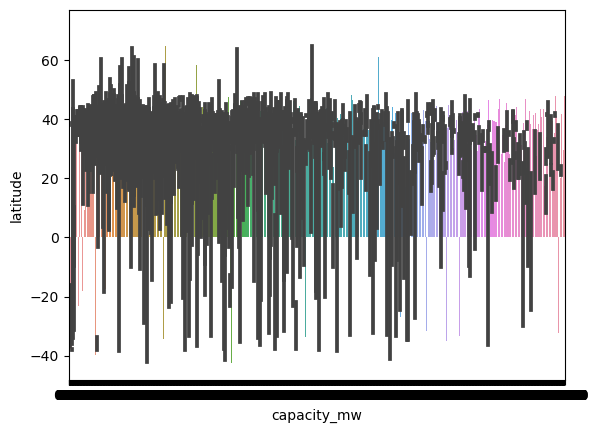

In [22]:
#we know 0 capacity power plant is not possible lets see bar plot for distribution of capacity
plt.figure()
sns.barplot(x ='capacity_mw', y = 'latitude',data = df)
plt.show()

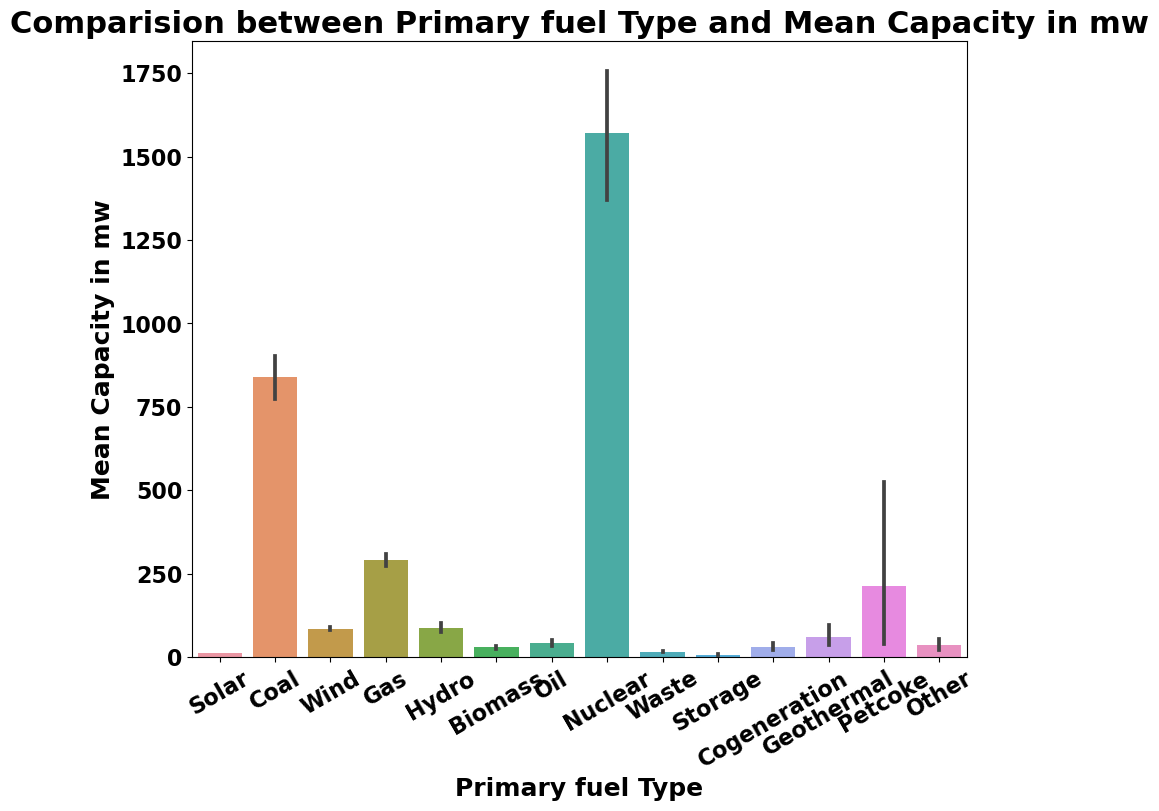

In [23]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

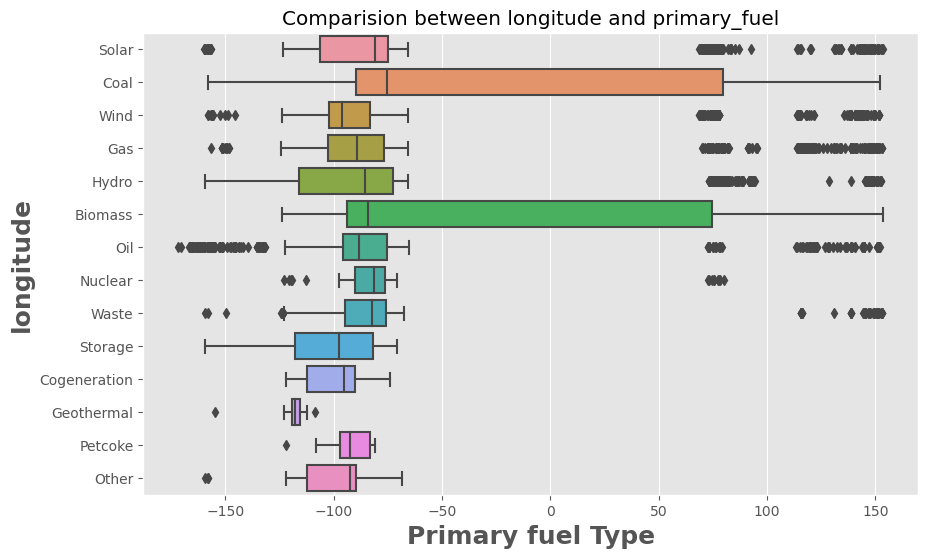

In [24]:
#Location vs Primary Fuel
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(y ='primary_fuel',x ="longitude", data = df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

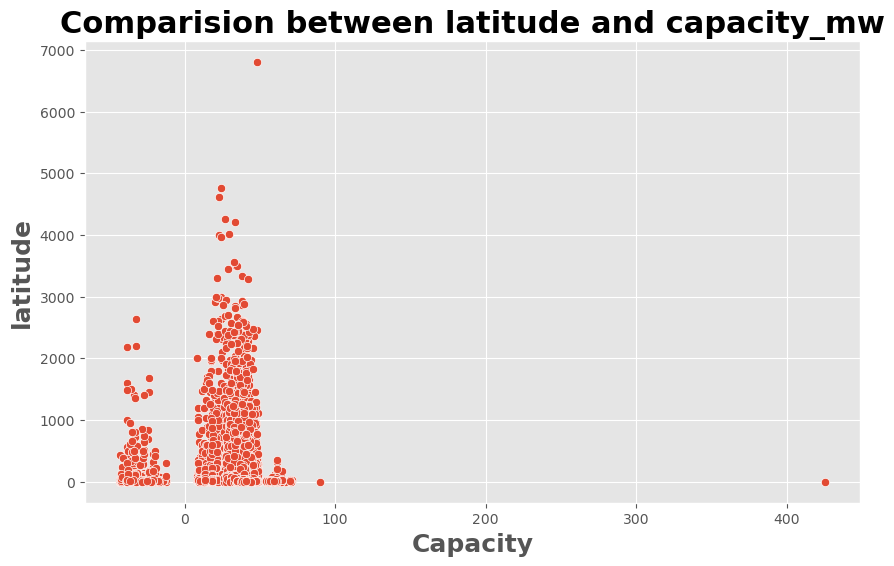

In [25]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(x ='latitude',y = "capacity_mw", data=df)
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

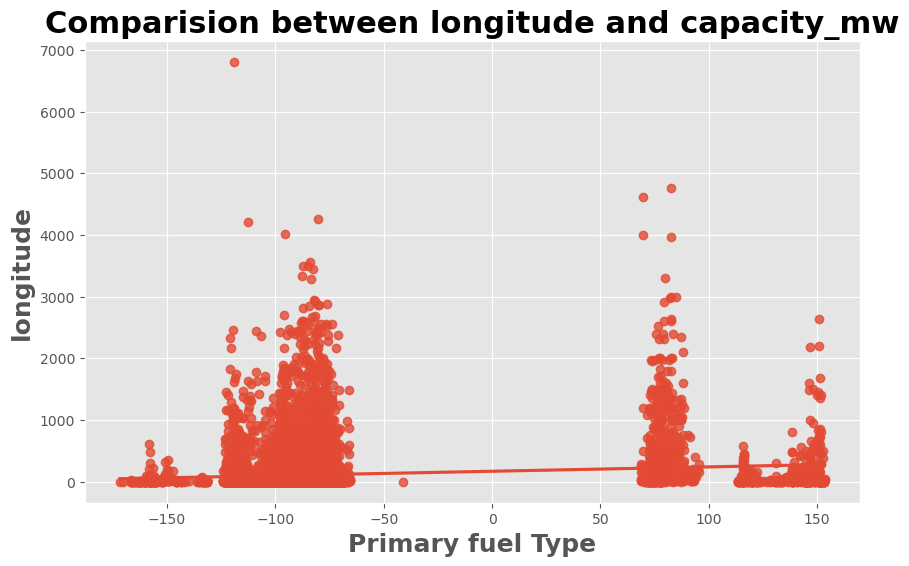

In [26]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(x='longitude',y="capacity_mw", data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

Commission age vs primary fuel

In [27]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2020
df['Power_plant_age'] = 2020 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [28]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 124.0
The youngest powerplant Age : 0.0


In [29]:
df.loc[df.Power_plant_age==124]

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
5637,USA,Granite,2.0,40.6192,-111.7821,Hydro,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,5.671,6.05,5.516,6.219,7.476,5.36,6.719,U.S. Energy Information Administration,124.0


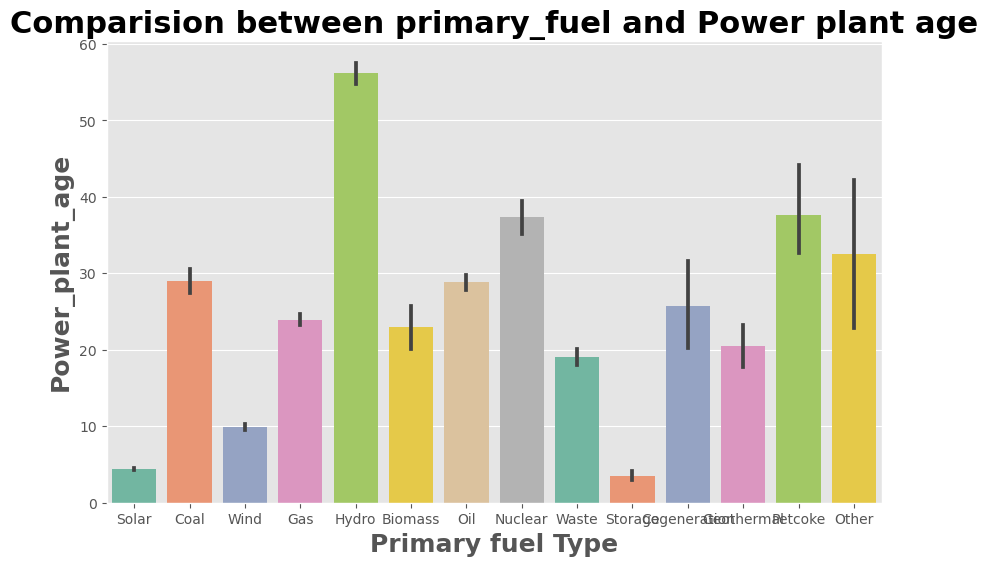

In [30]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

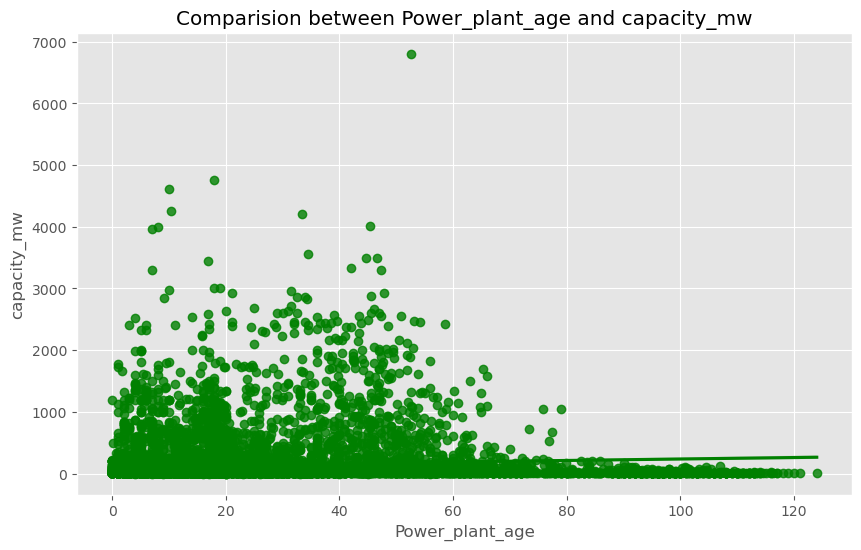

In [32]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x = df['Power_plant_age'],y = df['capacity_mw'],color = "g")

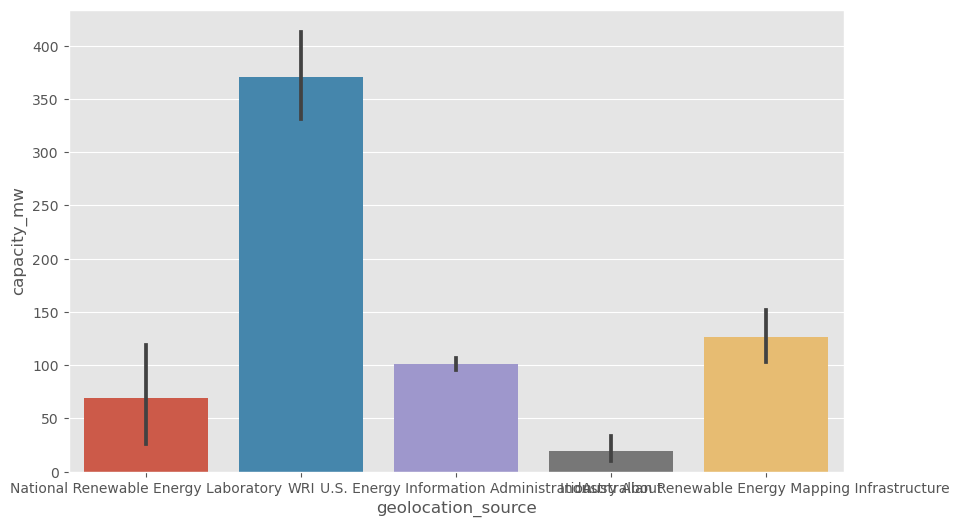

In [33]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

In [34]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI',
       'U.S. Energy Information Administration', 'Industry About',
       'Australian Renewable Energy Mapping Infrastructure'], dtype=object)

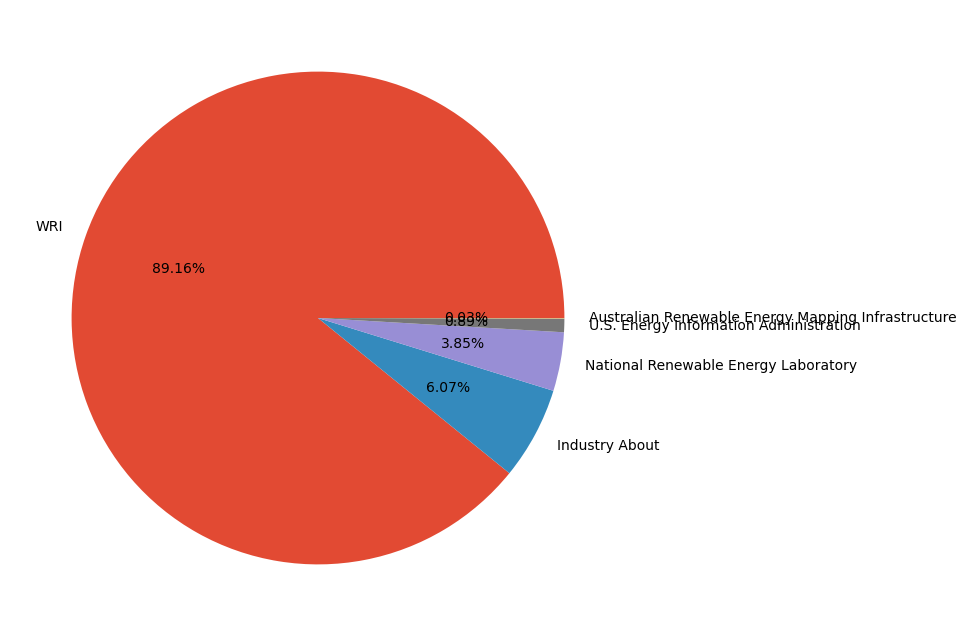

In [43]:
labels='WRI','Industry About','National Renewable Energy Laboratory','U.S. Energy Information Administration','Australian Renewable Energy Mapping Infrastructure'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.show()

In [44]:
#Distribution of features
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

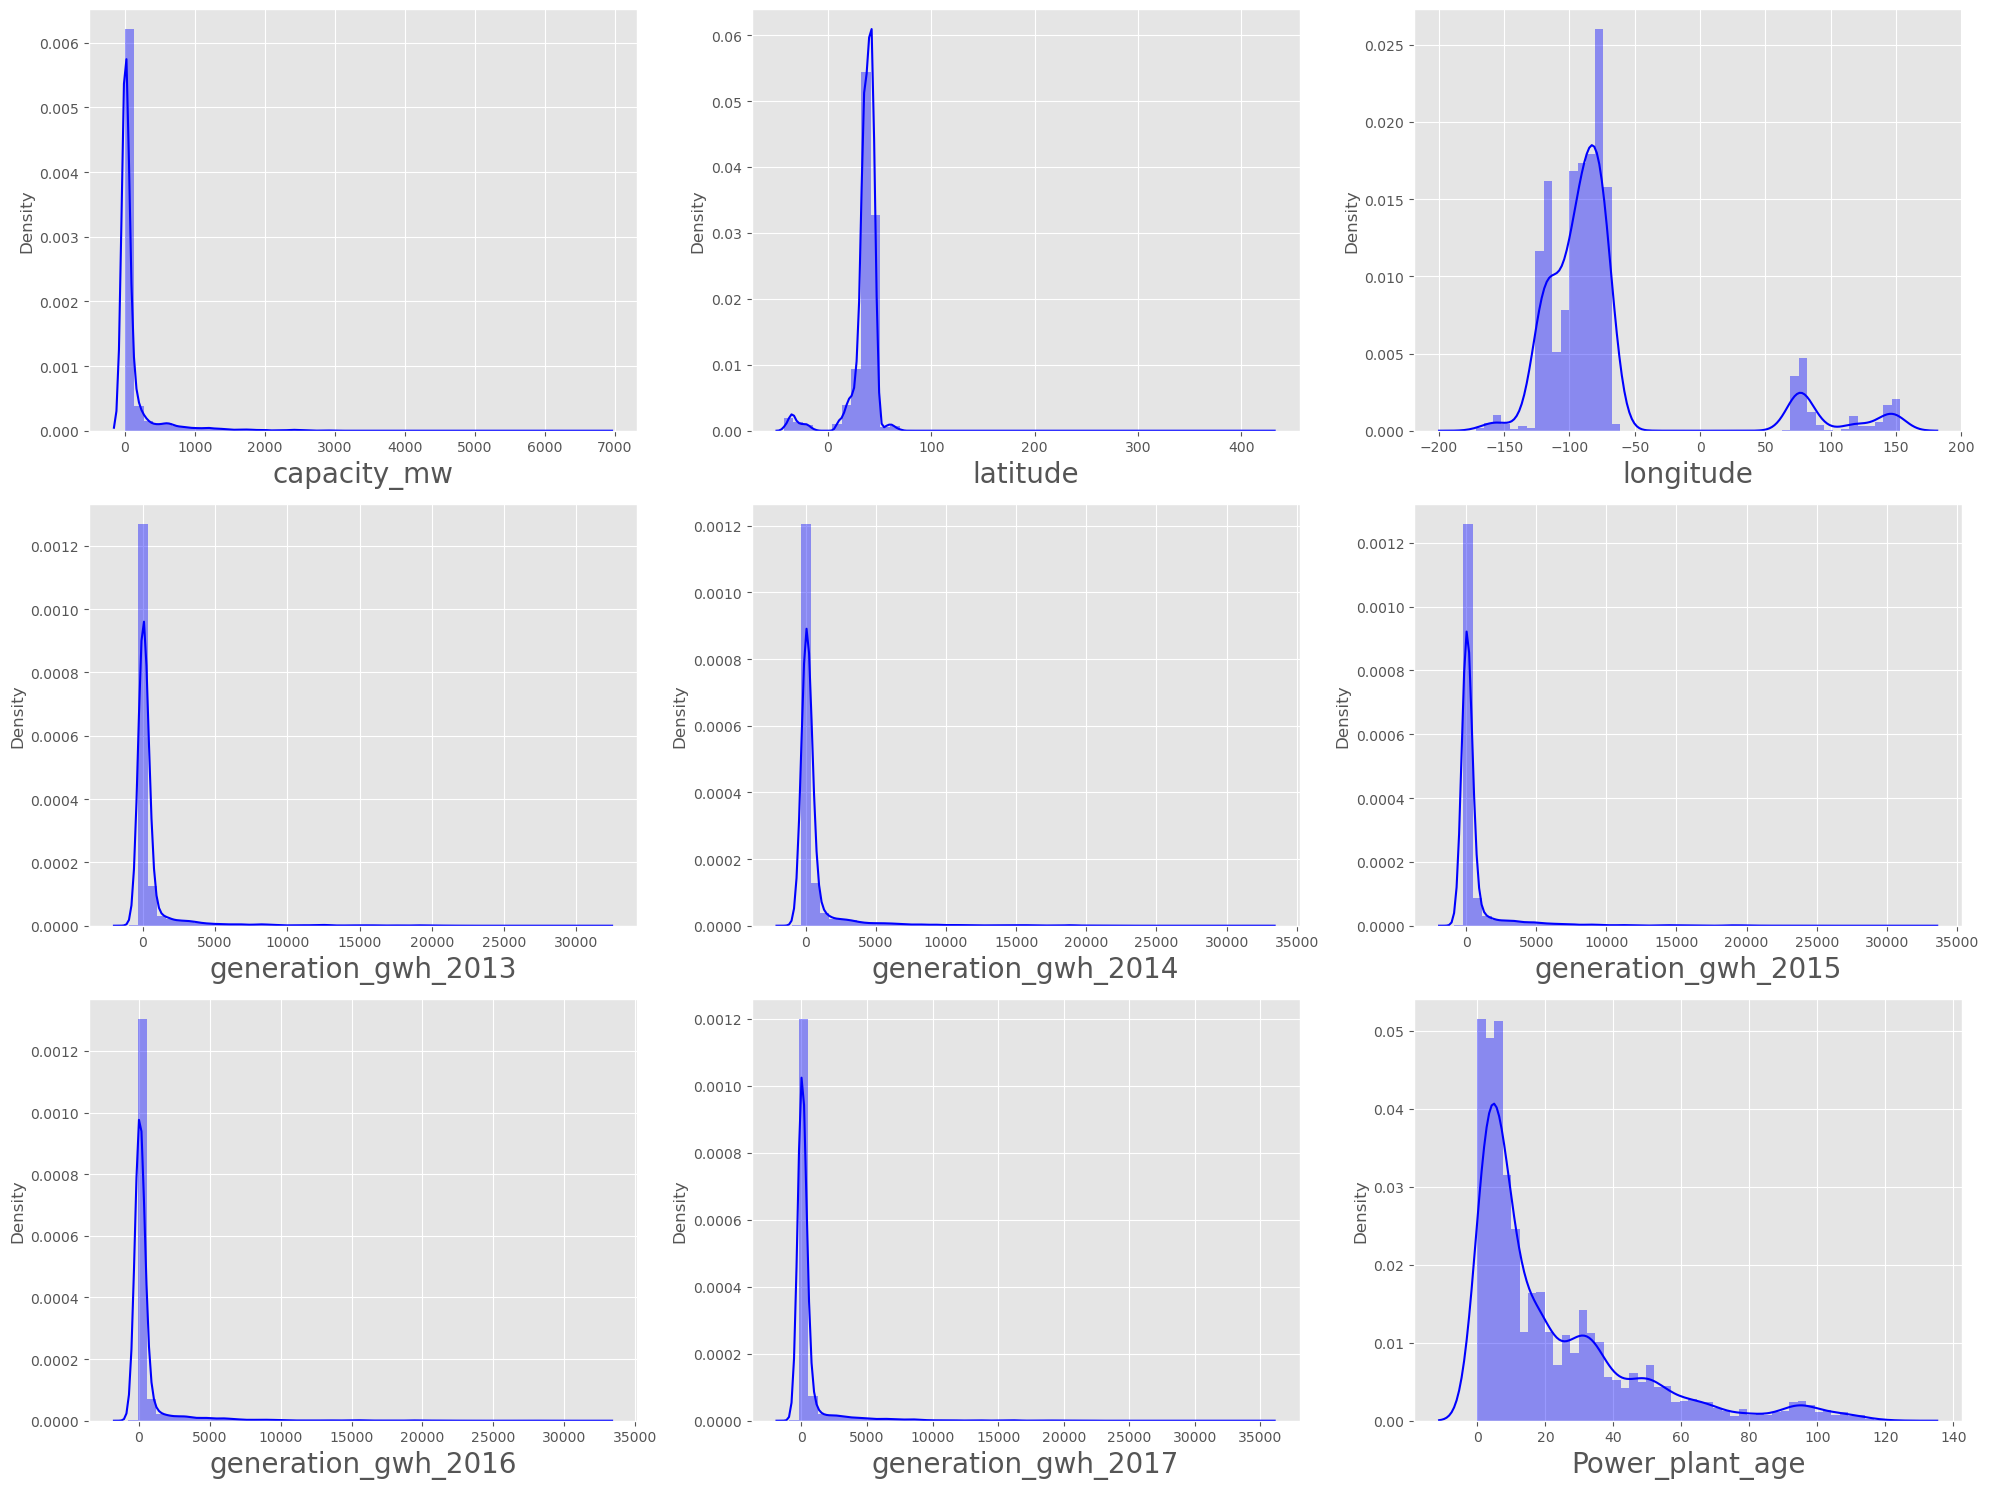

In [45]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

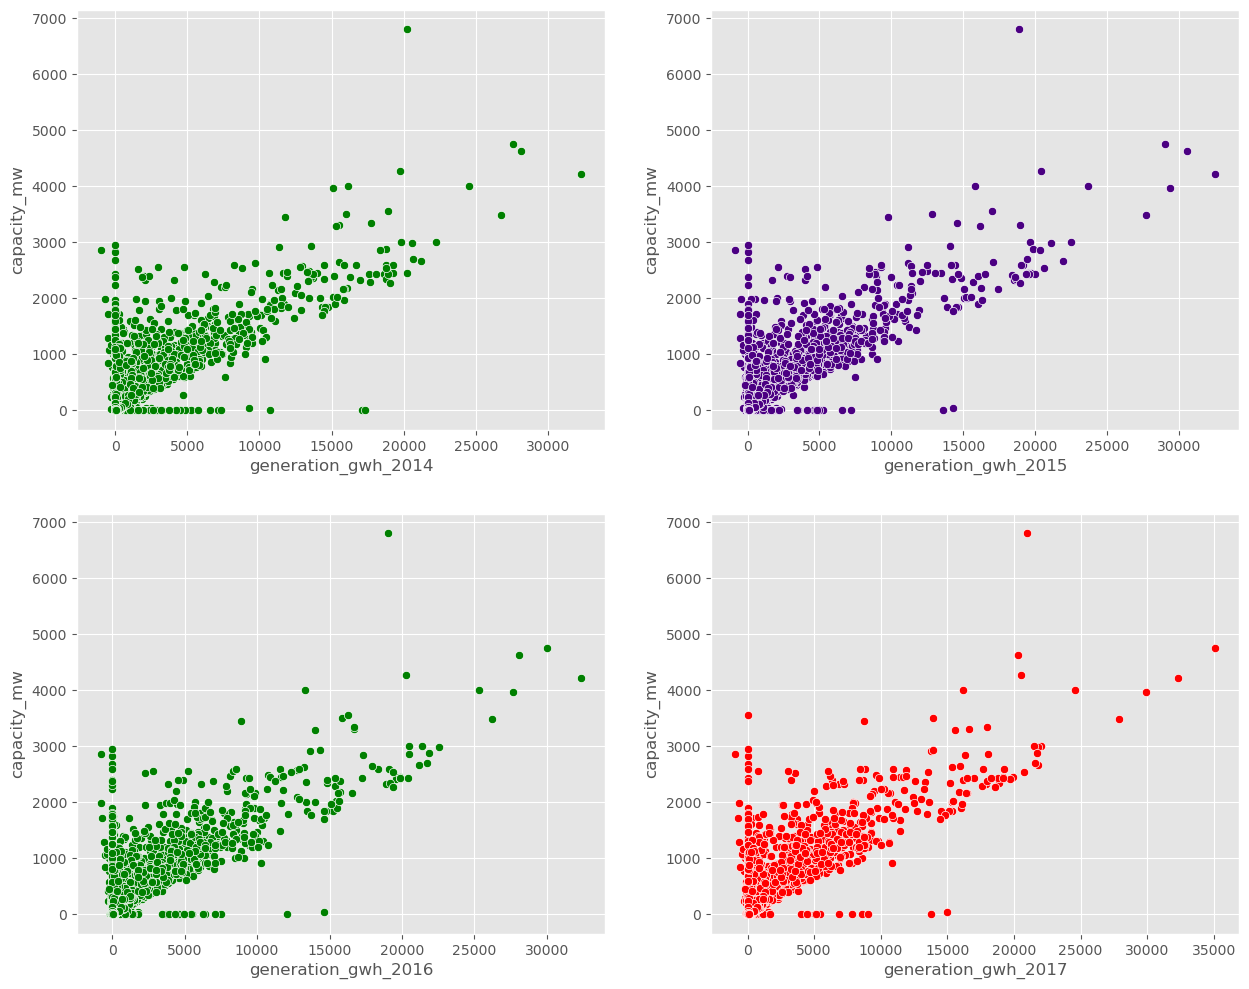

In [46]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()


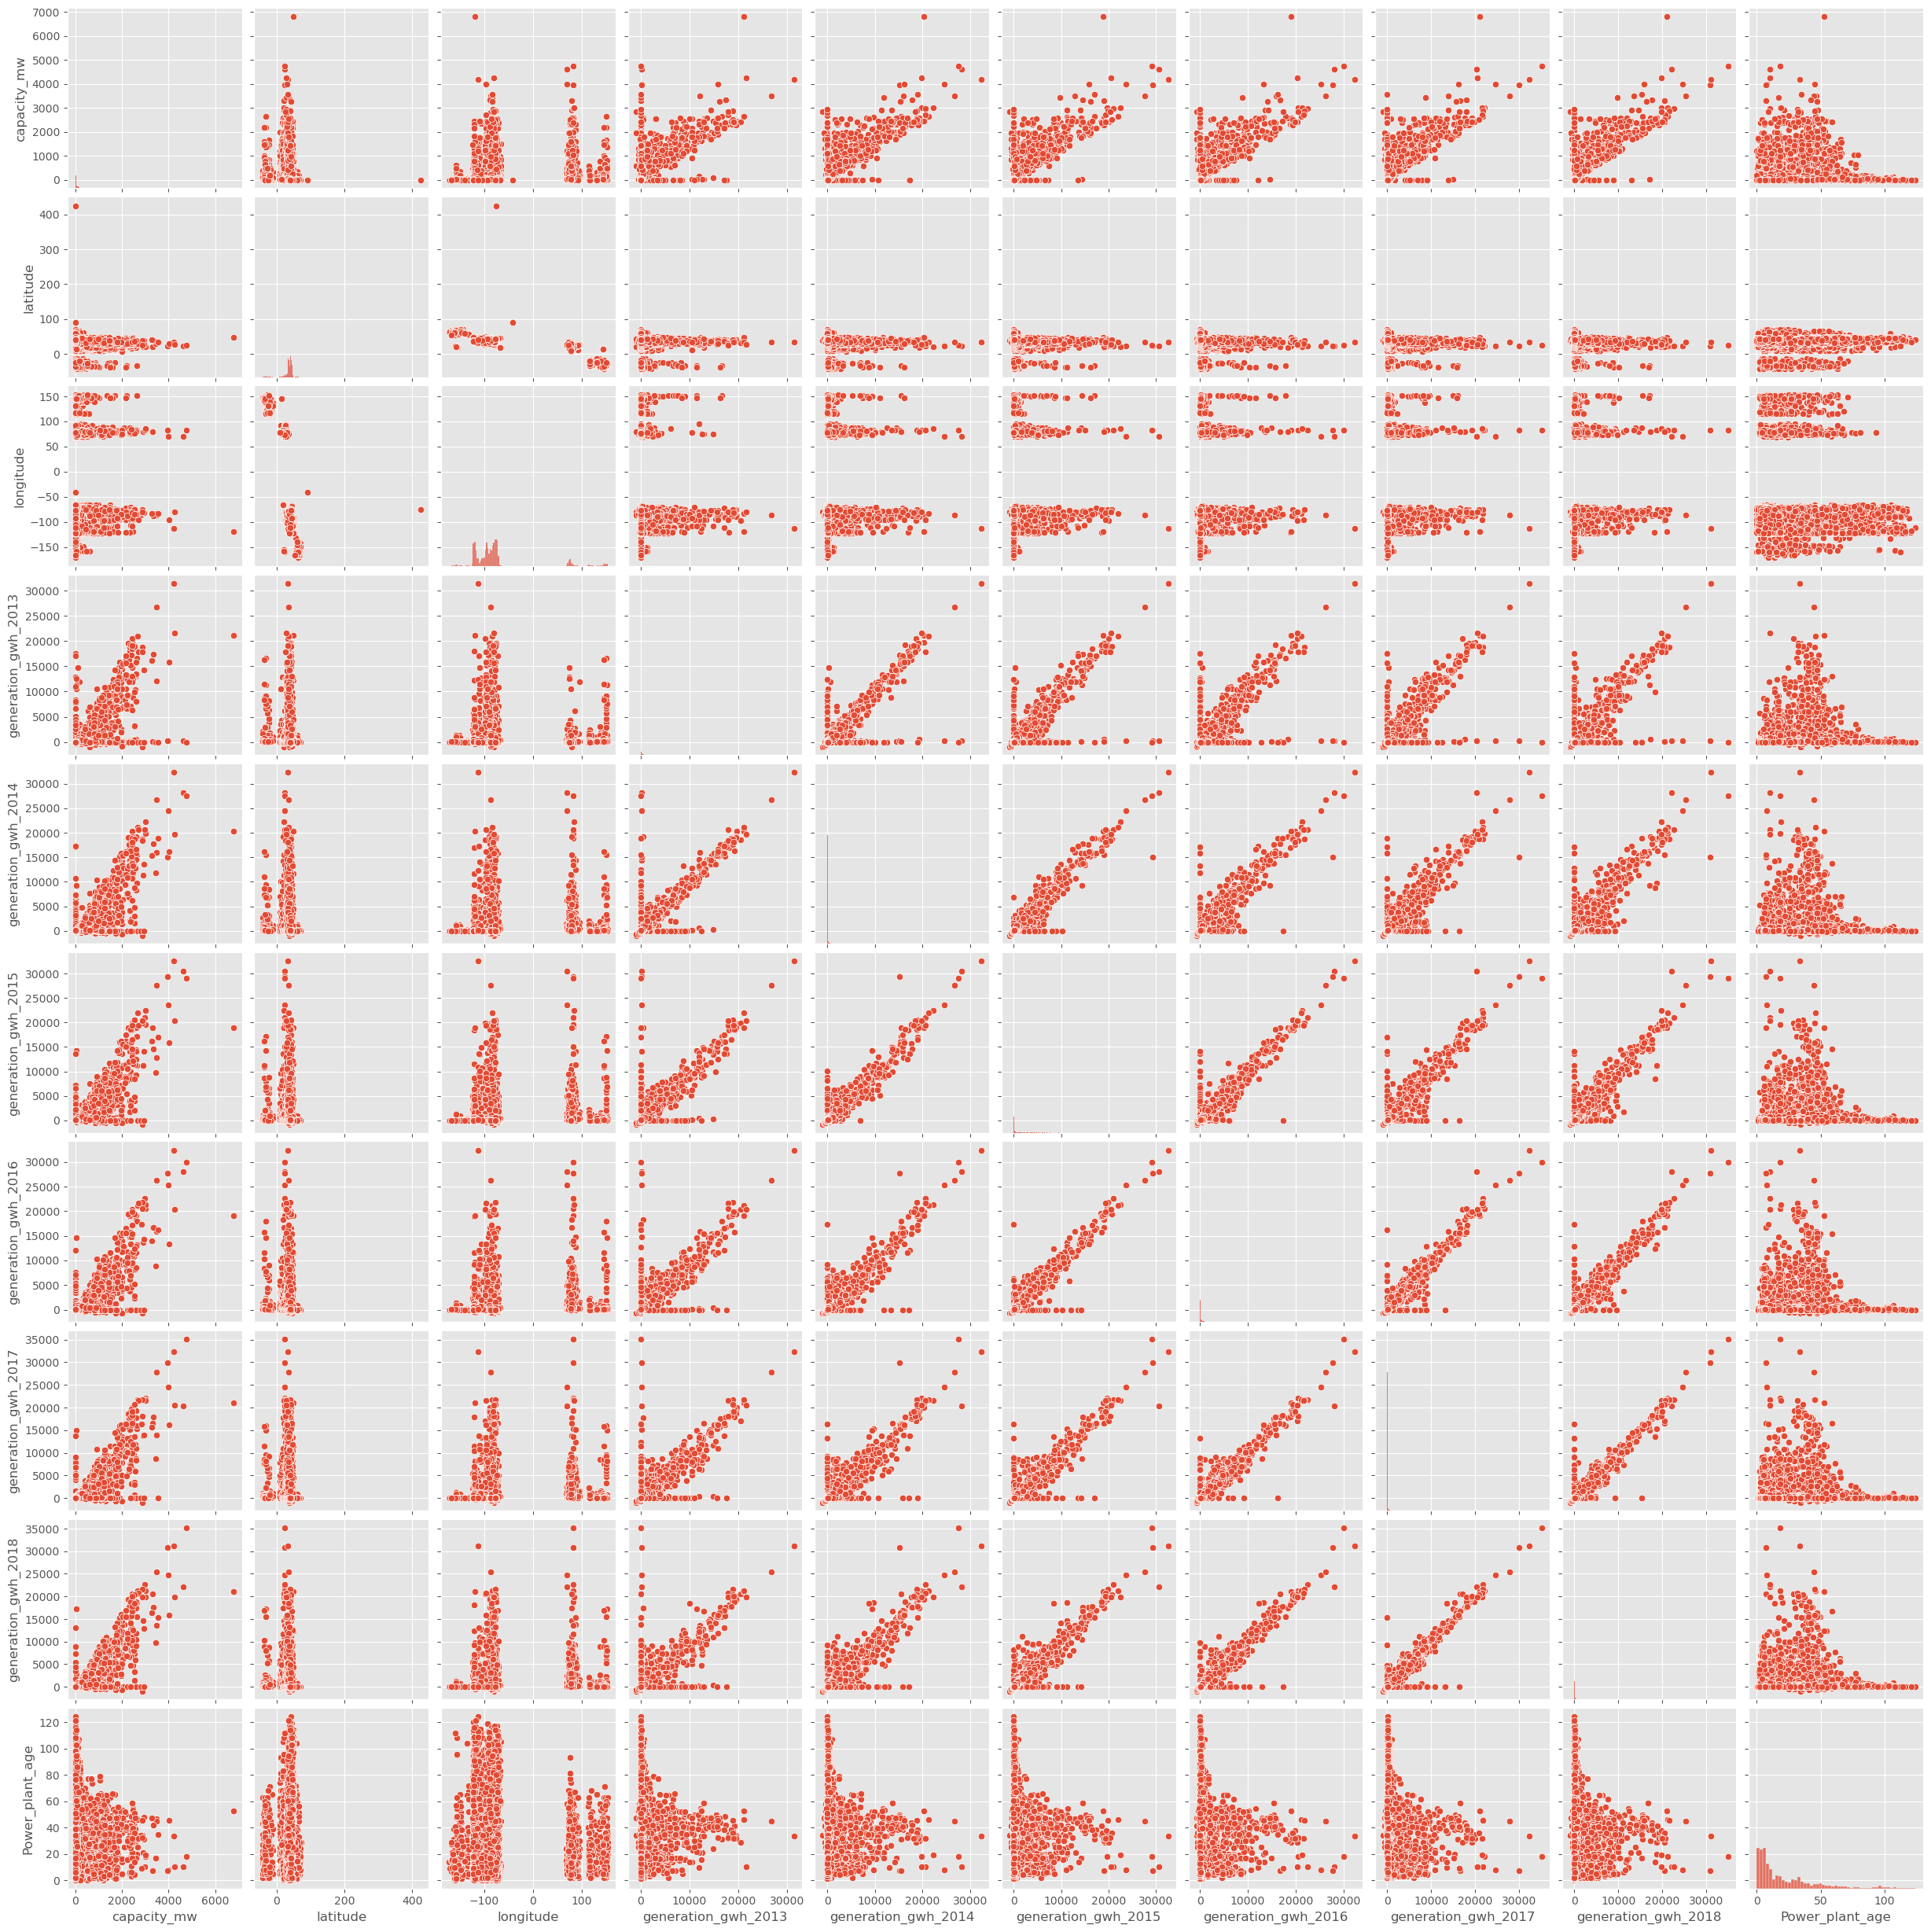

In [47]:
sns.pairplot(df)

In [48]:
#Encoding categorical data
df.drop(columns=['name'],axis=1,inplace=True)
df.drop(columns=['generation_data_source'],axis=1,inplace=True)
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [49]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,IND,2.5,28.1839,73.2407,10,12,116,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,IND,98.0,24.7663,74.6090,1,12,188,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,39.2,21.9038,69.3732,13,12,22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,135.0,23.8712,91.3602,3,12,24,4,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,16.0
4,IND,1800.0,21.9603,82.4091,1,5,24,4,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,5.0


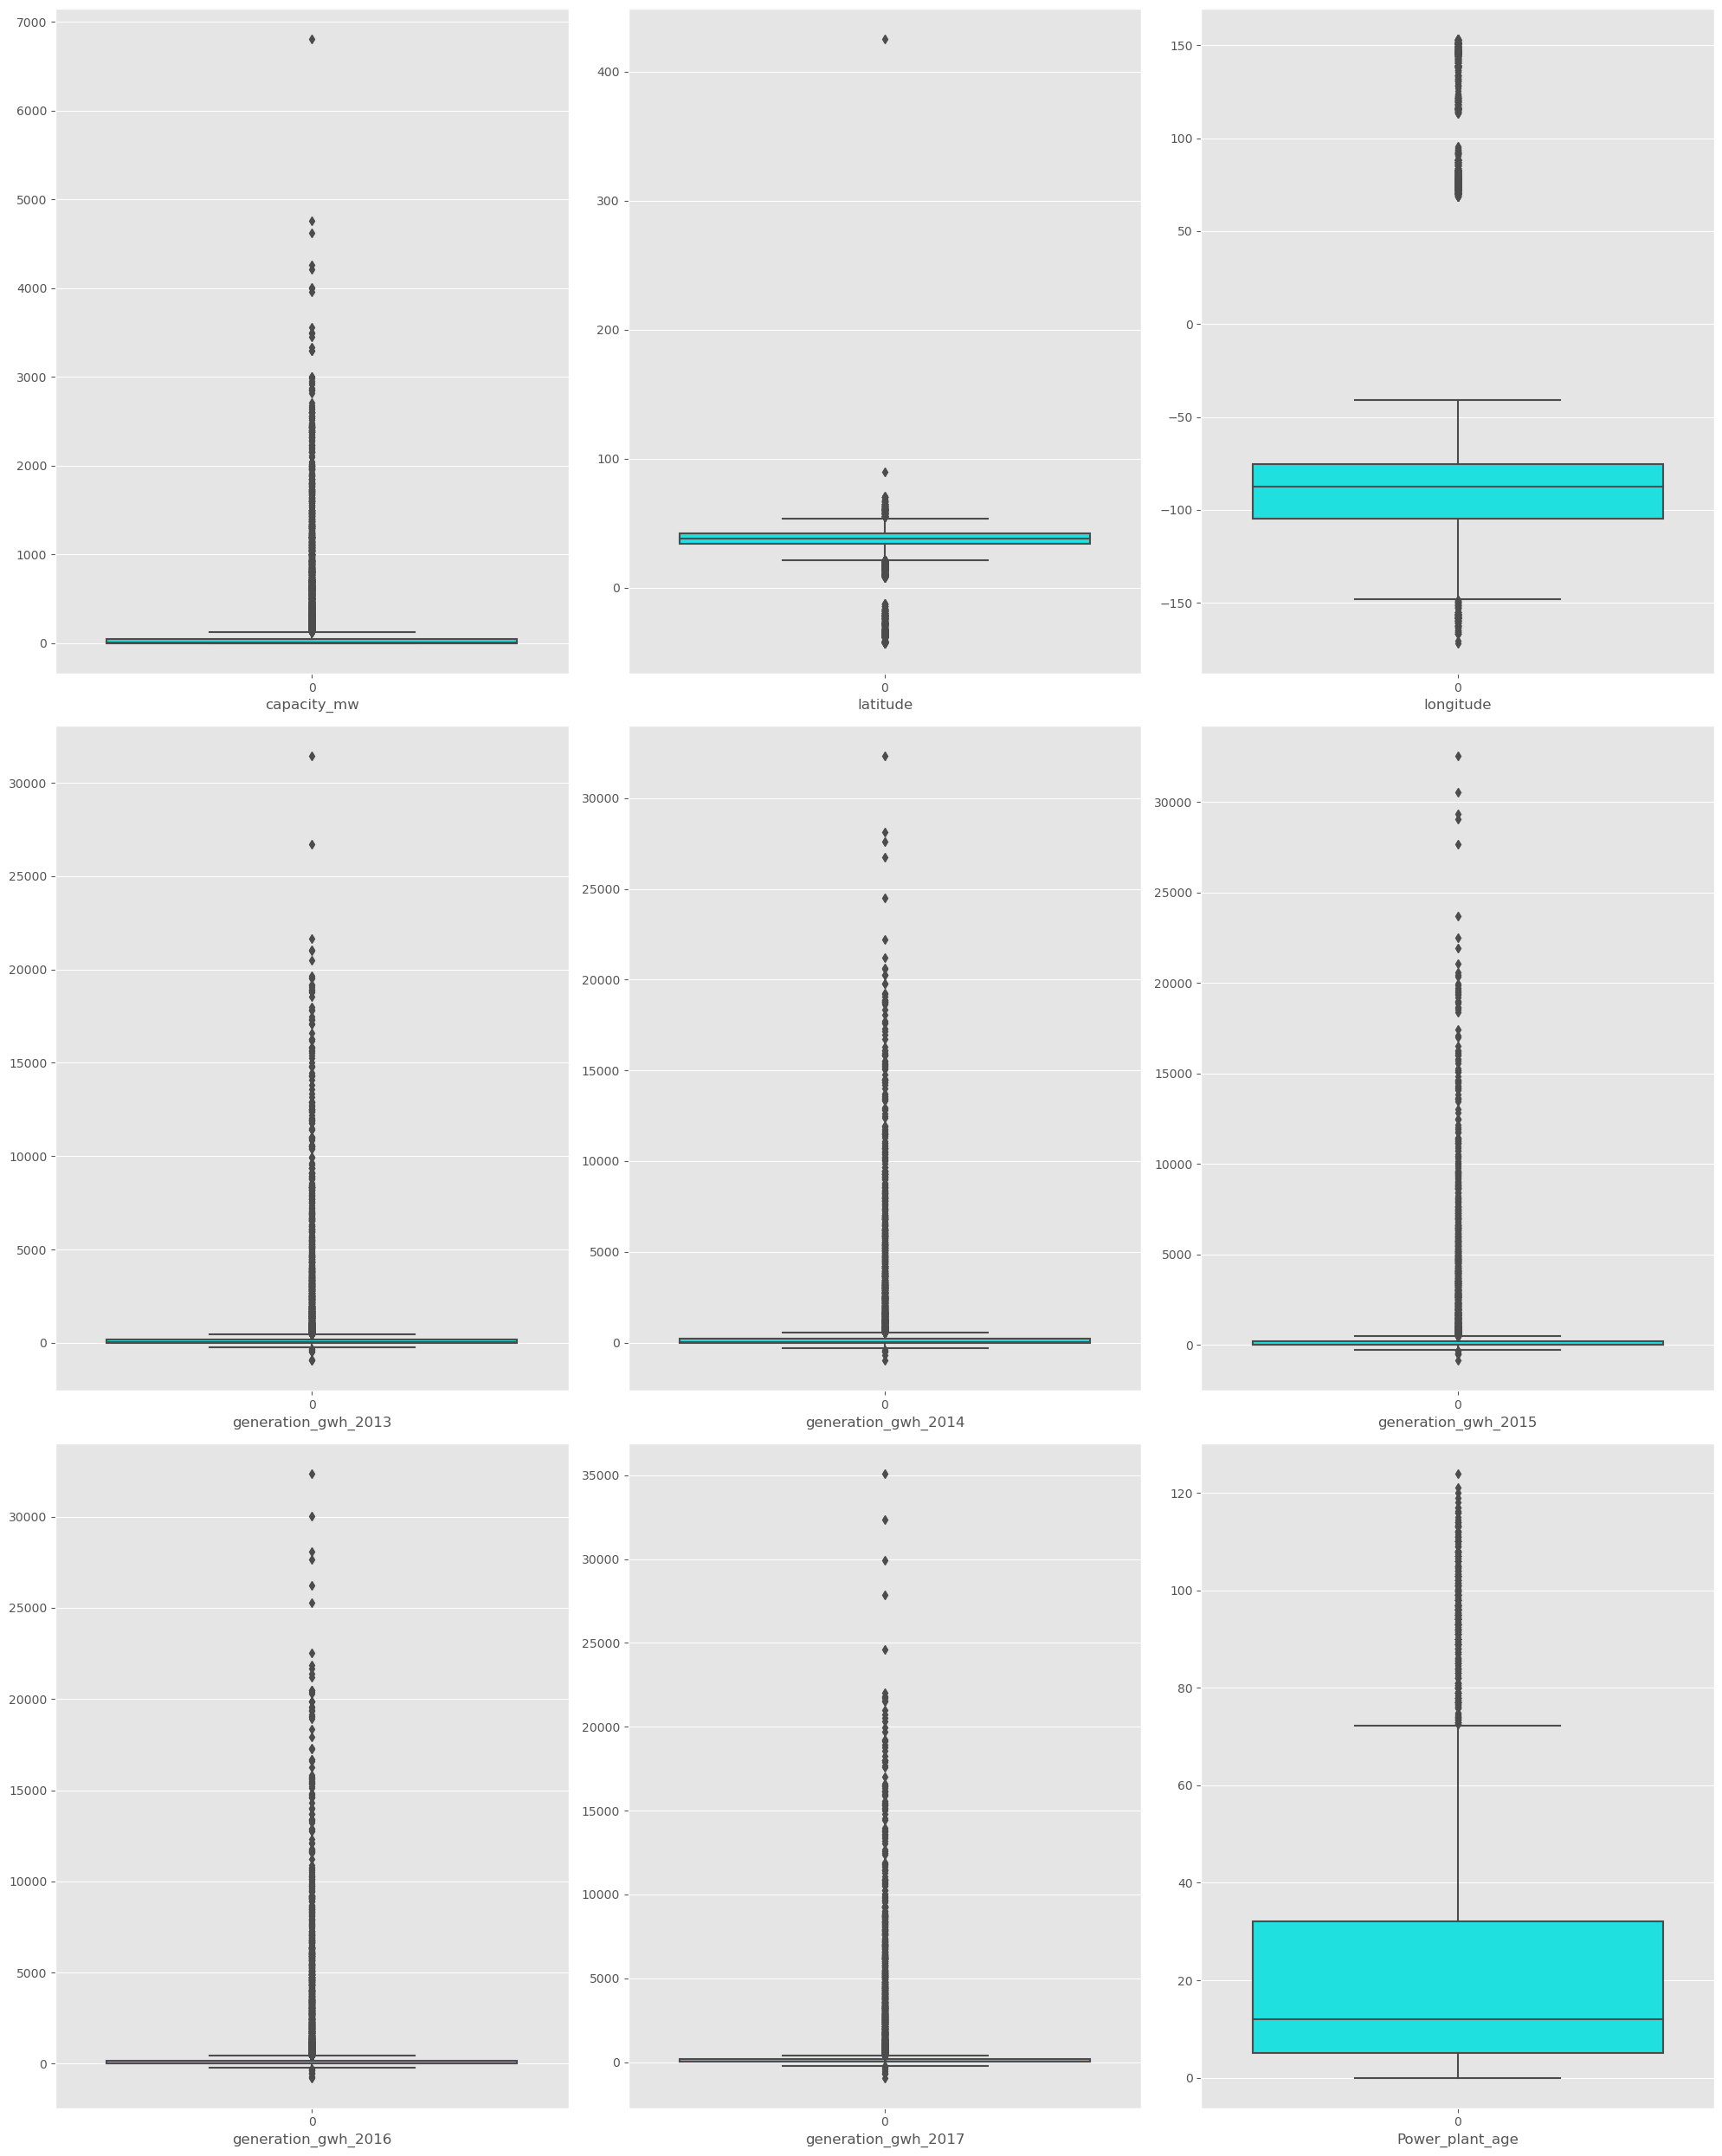

In [50]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [59]:
# Removal of unnessary columns
df.drop(columns=['country'],axis=1,inplace=True)

In [66]:
df2 = df.drop(columns=['generation_gwh_2019'],axis=1)

In [70]:
df3=df2.copy()

In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13298 non-null  float64
 1   latitude             13298 non-null  float64
 2   longitude            13298 non-null  float64
 3   primary_fuel         13298 non-null  int32  
 4   other_fuel1          13298 non-null  int32  
 5   generation_gwh_2013  7170 non-null   float64
 6   generation_gwh_2014  7534 non-null   float64
 7   generation_gwh_2015  7993 non-null   float64
 8   generation_gwh_2016  8701 non-null   float64
 9   generation_gwh_2017  9292 non-null   float64
 10  generation_gwh_2018  9858 non-null   float64
 11  Power_plant_age      10654 non-null  float64
dtypes: float64(10), int32(2)
memory usage: 1.1 MB


In [72]:
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             147.670000
latitude                 86.573740
longitude                99.715615
primary_fuel             14.000000
other_fuel1              12.000000
generation_gwh_2013    1407.321675
generation_gwh_2014    1534.097750
generation_gwh_2015    1375.332850
generation_gwh_2016    1233.300000
generation_gwh_2017    1363.395100
generation_gwh_2018    1398.034900
Power_plant_age          45.453406
dtype: float64


In [73]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(11451, 12)


In [74]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


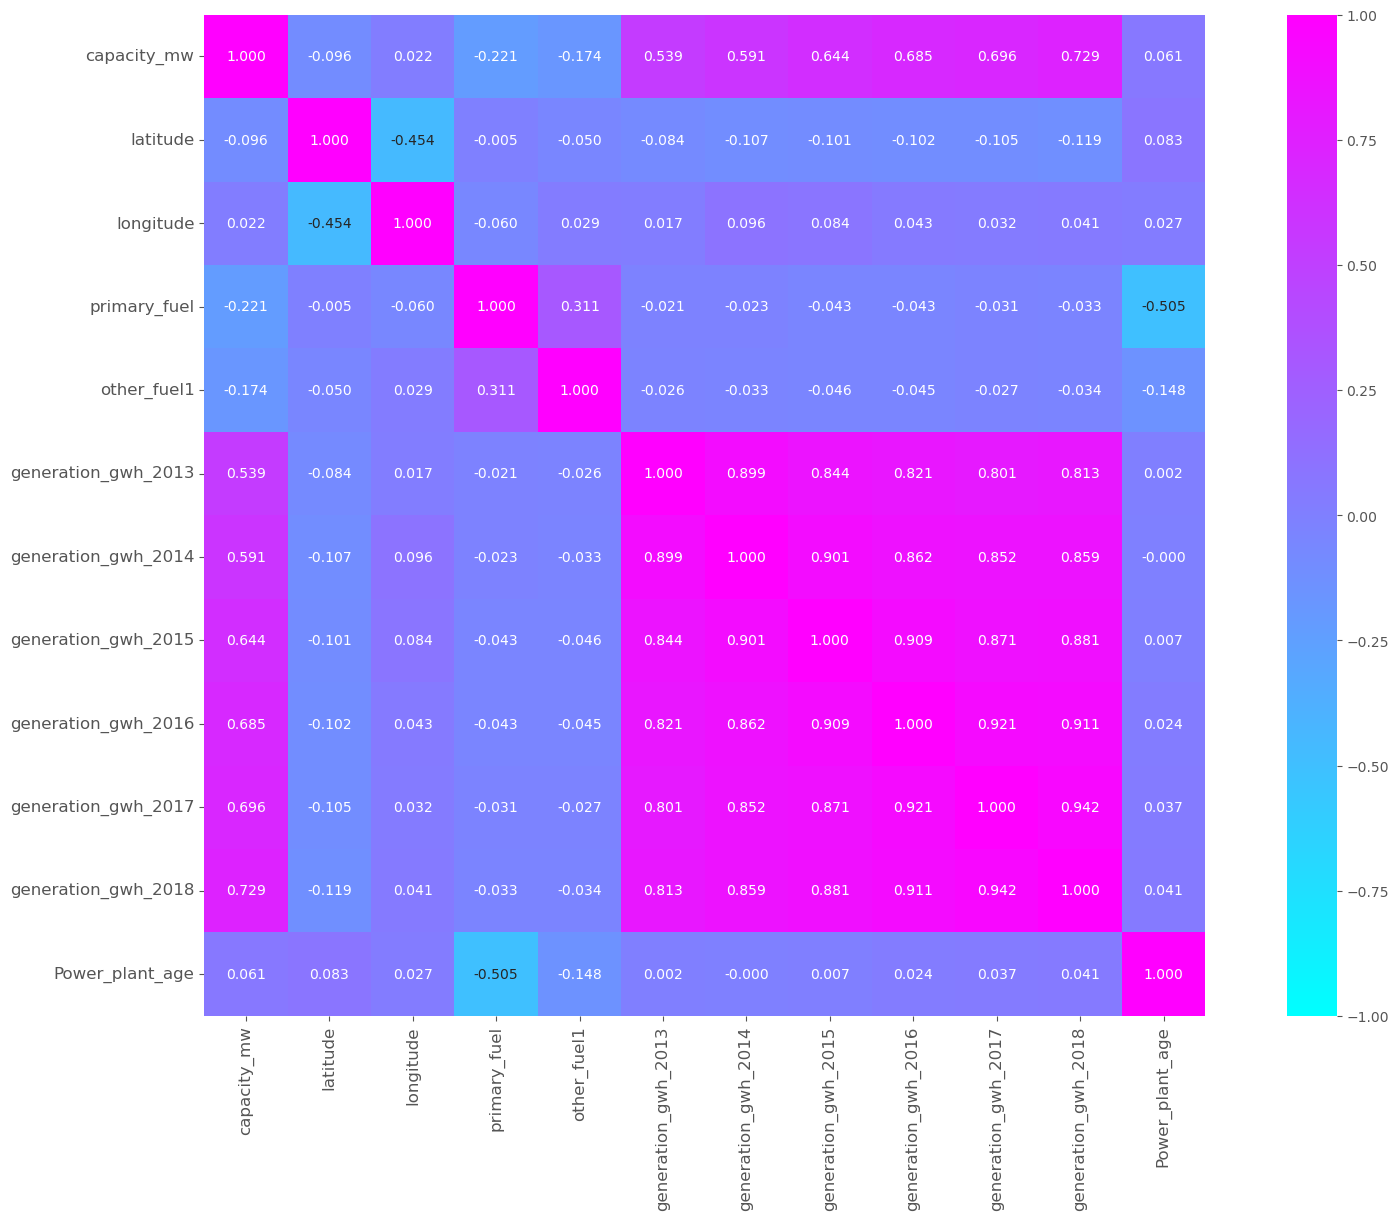

In [75]:
#correlation matrix
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

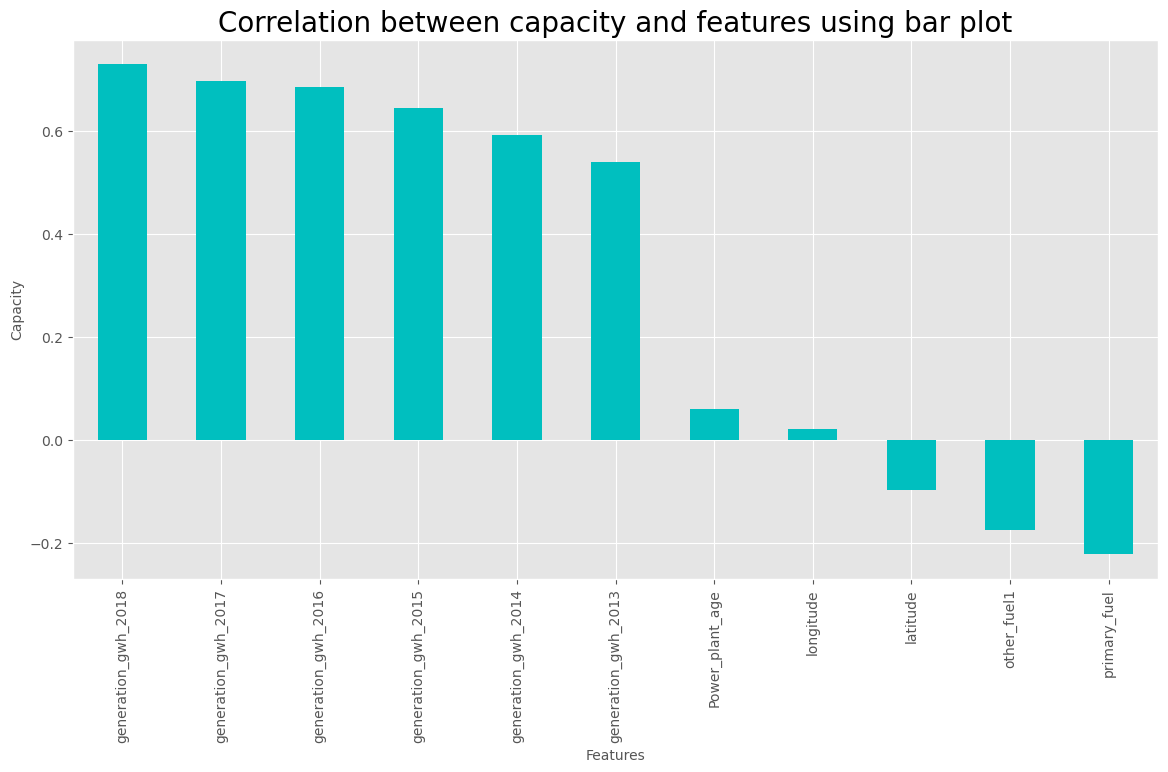

In [76]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

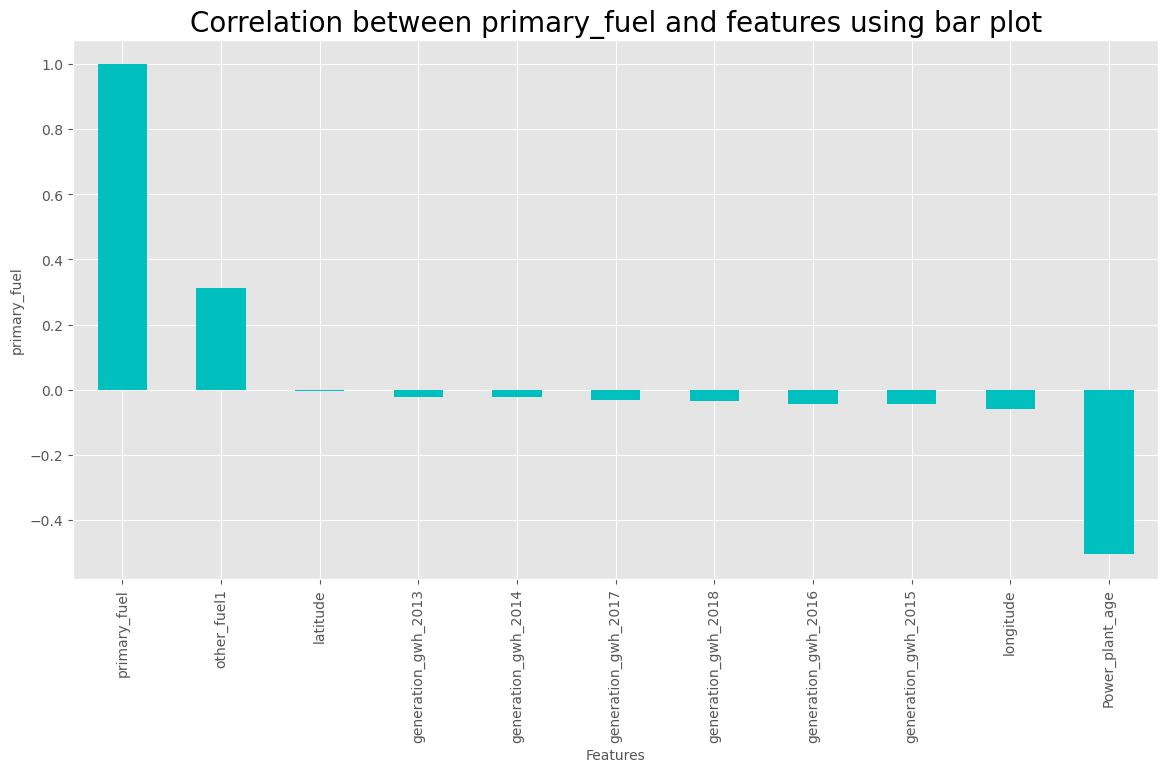

In [77]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [78]:
#Skewness
data.skew()

capacity_mw            2.883489
latitude              -0.540646
longitude              2.950420
primary_fuel          -0.444083
other_fuel1           -3.069484
generation_gwh_2013    4.255493
generation_gwh_2014    4.138351
generation_gwh_2015    4.005512
generation_gwh_2016    3.742811
generation_gwh_2017    3.807230
generation_gwh_2018    3.792753
Power_plant_age        1.730544
dtype: float64

In [79]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [80]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,3.050610,0.327369,NaN,NaN,NaN,NaN,NaN,-0.157649
1,3.052940,0.327369,NaN,NaN,NaN,NaN,NaN,NaN
2,3.043939,0.327369,NaN,NaN,NaN,NaN,NaN,NaN
5,3.042668,-3.091621,-0.471763,3.372461,3.731250,3.765895,3.681488,0.256347
6,3.056988,0.327369,-0.432737,0.440912,0.478418,0.038398,0.225448,1.261219


In [81]:
data.skew()

capacity_mw            2.883489
latitude              -0.540646
longitude              0.326960
primary_fuel          -0.444083
other_fuel1           -2.734183
generation_gwh_2013   -4.659141
generation_gwh_2014   -4.423801
generation_gwh_2015   -4.328617
generation_gwh_2016   -5.246406
generation_gwh_2017   -4.900520
generation_gwh_2018    3.792753
Power_plant_age        0.006489
dtype: float64

In [82]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [84]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (8015, 6)
Training target vector size: (8015,)
Test feature matrix size: (3436, 6)
Test target vector size: (3436,)
